In [13]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import seaborn as sns

from viz_helpers import visualize, query_plot_setting, default_plot_setting, tree_plot_setting, set_cycler, lattice_node_pos

from helpers import infected_nodes, cascade_source
from graph_helpers import load_graph_by_name, remove_filters, get_edge_weights, extract_edges, extract_nodes



In [66]:
graph = 'lattice-1024-sto'
graph_suffix = '_rev'
obs_method = "0.2"
cascade_fraction = "0.01"
cascade_model = 'ic'




In [56]:
g = load_graph_by_name(graph, weighted=True, suffix=graph_suffix)
if graph.startswith('lattice'):
    n = int(np.sqrt(g.num_vertices()))
    pos = lattice_node_pos(g, shape=(n, n))
else:
    pos = sfdp_layout(g)

load graph from data/lattice-1024-sto/graph_weighted_rev.gt


In [92]:
cascade_id = 77

cascade size 25


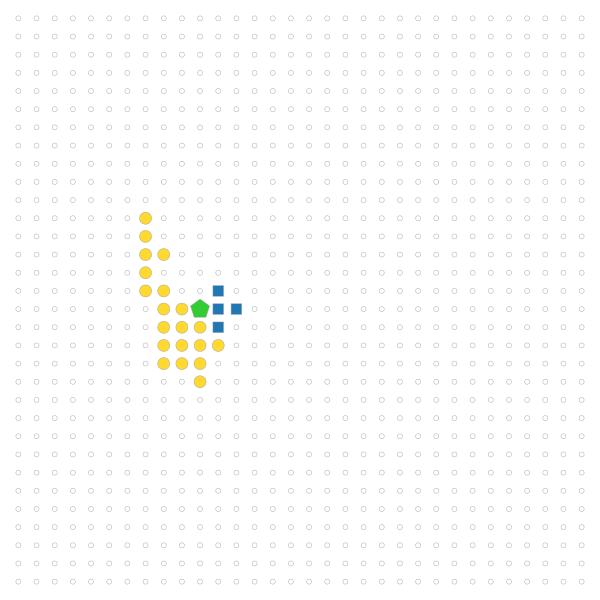

In [93]:
dataset_id = '{}-m{}-s{}-o{}-ombfs-head'.format(graph, cascade_model, cascade_fraction, obs_method)
cascade_dir = 'cascade-weighted/{}'.format(dataset_id)
fig_dirname = 'figs/inspect-query-process/{}'.format(dataset_id)

if not os.path.exists(fig_dirname):
    os.makedirs(fig_dirname)

obs, c = pkl.load(open('{}/{}.pkl'.format(cascade_dir, cascade_id), 'rb'))[:2]
inf_nodes = infected_nodes(c)
source = cascade_source(c)
print('cascade size', len(infected_nodes(c)))
# plot cascade and observations
setting = default_plot_setting(g, c, obs)
visualize(g, pos,
          **setting,
          output='{}/cascade.png'.format(fig_dirname))

cascade size 25


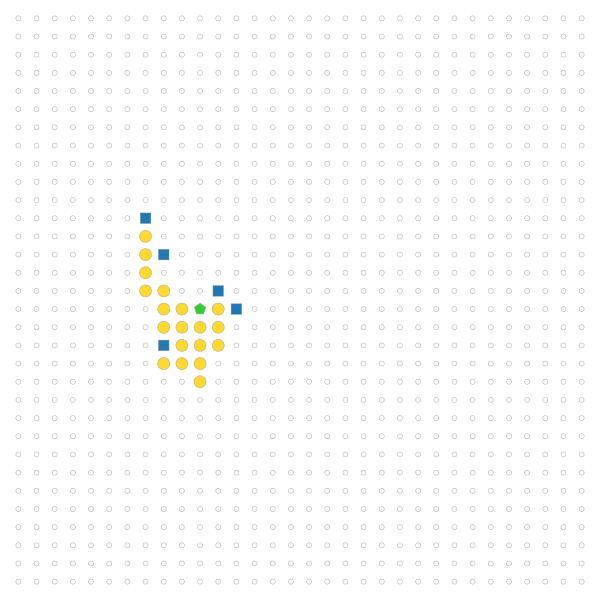

In [94]:
dataset_id = '{}-m{}-s{}-o{}-omleaves'.format(graph, cascade_model, cascade_fraction, obs_method)
cascade_dir = 'cascade-weighted/{}'.format(dataset_id)
fig_dirname = 'figs/inspect-query-process/{}'.format(dataset_id)

if not os.path.exists(fig_dirname):
    os.makedirs(fig_dirname)
    
obs, c = pkl.load(open('{}/{}.pkl'.format(cascade_dir, cascade_id), 'rb'))[:2]
inf_nodes = infected_nodes(c)
source = cascade_source(c)
print('cascade size', len(infected_nodes(c)))
# plot cascade and observations
setting = default_plot_setting(g, c, obs)
visualize(g, pos,
          **setting,
          output='{}/cascade.png'.format(fig_dirname))